In [1]:
import torch
from RzLinear import RzLinear 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# checkout the mapping

In [2]:
weight_size = 1000
input_dim = 128
output_dim = 128
chunk_size = 4

#hashed_weight = nn.Parameter(torch.from_numpy(np.random.uniform(-1/np.sqrt(input_dim), 1/np.sqrt(input_dim), size=((weight_size,))).astype(np.float32)))
hashed_weight = nn.Parameter(torch.from_numpy(np.arange(weight_size).astype(np.float32)))
rzlinear = RzLinear(input_dim, output_dim, chunk_size, hashed_weight).to("cuda:0");

input_v = torch.eye(input_dim).to("cuda:0")
output_v = rzlinear(input_v)
#print(output_v[:16,:16])
#print(output_v[16:32,16:32])
#print(output_v[16:96,:16])
#plt.hist(np.array(output_v.detach().cpu().view(-1)))
#np.max(np.array(output_v.detach().cpu().view(-1)))
output_v[1,:].long()


RandomNumbers:  tensor([2038074743,  634329019, 1825252241,  871205357,   80759397])
RzLinear: d1xd2: 128x128 chunk_size: 4 weight_size: 1000  tiled: True


tensor([516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529,
        530, 531,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
         68,  69,  70,  71, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
        351, 352, 353, 354, 355, 356, 626, 627, 628, 629, 630, 631, 632, 633,
        634, 635, 636, 637, 638, 639, 640, 641, 527, 528, 529, 530, 531, 532,
        533, 534, 535, 536, 537, 538, 539, 540, 541, 542,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82, 352, 353,
        354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367,
        253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
        267, 268], device='cuda:0')

In [3]:
for i in range(int(input_dim/16)):
    for j in range(int(input_dim/16)):
        x = output_v[i*16:(i+1)*16, j*16:(j+1)*16].reshape(-1)
        print(x[-1] - x[0])
    

tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0', grad_fn=<SubBackward0>)
tensor(255., device='cuda:0'

# Checkout the Randomness

RandomNumbers:  tensor([2038074743,  634329019, 1825252241,  871205357,   80759397])
RzLinear: d1xd2: 1000x1000 chunk_size: 2 weight_size: 100000  tiled: True
torch.Size([1000, 1000])


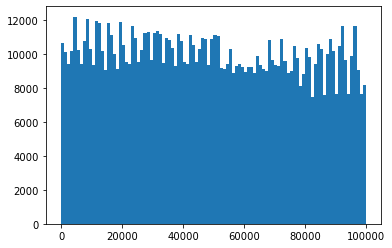

In [4]:

weight_size = 100000
input_dim = 1000
output_dim = 1000
chunk_size = 2

#hashed_weight = nn.Parameter(torch.from_numpy(np.random.uniform(-1/np.sqrt(input_dim), 1/np.sqrt(input_dim), size=((weight_size,))).astype(np.float32)))
hashed_weight = nn.Parameter(torch.from_numpy(np.arange(weight_size).astype(np.float32)))
rzlinear = RzLinear(input_dim, output_dim, chunk_size, hashed_weight).to("cuda:0");

input_v = torch.eye(input_dim).to("cuda:0")
output_v = rzlinear(input_v)
print(output_v.shape)


plt.hist(np.array(output_v.detach().cpu()).reshape(-1), bins = int(input_dim/10))
plt.show()
#output_v[1,:].long()



# Checkout the correctness of forward pass

In [24]:
weight_size = 1000000
input_dim = 1000
output_dim = 1000
chunk_size = 5

hashed_weight = nn.Parameter(torch.from_numpy(np.arange(weight_size).astype(np.float32)))
rzlinear = RzLinear(input_dim, output_dim, chunk_size, hashed_weight).to("cuda:0");
input_v = torch.eye(input_dim).to("cuda:0")
idx_matrix = rzlinear(input_v).long()


RandomNumbers:  tensor([2038074743,  634329019, 1825252241,  871205357,   80759397])
RzLinear: d1xd2: 1000x1000 chunk_size: 5 weight_size: 1000000  tiled: True


In [25]:
idx_matrix.long()

tensor([[     0,      1,      2,  ...,    997,    998,    999],
        [   100,    101,    102,  ...,   1097,   1098,   1099],
        [   200,    201,    202,  ...,   1197,   1198,   1199],
        ...,
        [ 99700,  99701,  99702,  ..., 100697, 100698, 100699],
        [ 99800,  99801,  99802,  ..., 100797, 100798, 100799],
        [ 99900,  99901,  99902,  ..., 100897, 100898, 100899]],
       device='cuda:0')

In [26]:
hashed_weight = nn.Parameter(torch.from_numpy(np.random.uniform(-1,1, size=(weight_size,)).astype(np.float32)))
rzlinear = RzLinear(input_dim, output_dim, chunk_size, hashed_weight).to("cuda:0");


RandomNumbers:  tensor([2038074743,  634329019, 1825252241,  871205357,   80759397])
RzLinear: d1xd2: 1000x1000 chunk_size: 5 weight_size: 1000000  tiled: True


In [27]:
out = rzlinear(input_v)

In [28]:
matrix = hashed_weight[idx_matrix]

In [29]:
ground_truth = torch.matmul(input_v, matrix)

In [30]:
if torch.norm(out - ground_truth) == 0:
    print("All OK")
else:
    print("Issue in forward pass")

All OK


# Check Backprop

In [1]:
from RzLinear import RzLinearFunction
import torch
from RzLinear import RzLinear 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [42]:
TILED = True
weight_size = 1000
input_dim = 64
output_dim = 64
chunk_size = 1
seed = 1024
r = np.random.RandomState(seed)
x = r.randint(0, 2038074743, (50,))
x = x + 1*(x%2==0);
random_numbers = torch.from_numpy(np.concatenate([np.array([2038074743]), x])).long().cuda(0) # set of 50 random numbers to use
print(random_numbers[:5])
hashed_weight = nn.Parameter(torch.from_numpy(np.arange(weight_size).astype(np.float32))).to("cuda:0")
input_v = torch.eye(input_dim).cuda(0)
#hashed_weight

tensor([2038074743,  634329019, 1825252241,  871205357,   80759397],
       device='cuda:0')


In [43]:
RzLinearFunction.forwardproxy(hashed_weight, input_v ,random_numbers, input_dim, output_dim, chunk_size, TILED)

tensor([[259., 260., 261.,  ..., 594., 595., 596.],
        [275., 276., 277.,  ..., 610., 611., 612.],
        [291., 292., 293.,  ..., 626., 627., 628.],
        ...,
        [240., 241., 242.,  ..., 727., 728., 729.],
        [256., 257., 258.,  ..., 743., 744., 745.],
        [272., 273., 274.,  ..., 759., 760., 761.]], device='cuda:0')

In [44]:
def myFunc(hashed_weight, input_v, random_numbers, input_dim, output_dim, chunk_size, tiled):
    out = RzLinearFunction.forwardproxy(hashed_weight, input_v, random_numbers, input_dim, output_dim, chunk_size , tiled)
    return out, torch.sum(out)

In [45]:
out, val = myFunc(hashed_weight, input_v, random_numbers, input_dim, output_dim, chunk_size, TILED )
torch.cuda.synchronize()
print("loss", val)

loss tensor(1972224., device='cuda:0')


In [46]:
grad = out * 0 + 1

In [47]:
torch.sum(grad)

tensor(4096., device='cuda:0')

In [48]:
wt_grad, in_grad = RzLinearFunction.backwardproxy(grad, hashed_weight, input_v, random_numbers, input_dim, output_dim, chunk_size, TILED)
torch.cuda.synchronize()

In [49]:
torch.sum(wt_grad)

tensor(4096., device='cuda:0')

In [85]:
epsilon = 0.001
_, f0 = myFunc(hashed_weight, input_v, random_numbers, input_dim, output_dim, chunk_size, TILED)
hwt_grad = torch.empty_like(hashed_weight, dtype=torch.float32)
for i in range(len(hashed_weight)):
#for i in [10]:
    hwt = hashed_weight.clone()
    hwt[i] += epsilon
    _, fi = myFunc(hwt, input_v, random_numbers, input_dim, output_dim, chunk_size,TILED)
    hwt_grad[i] = (fi - f0) / epsilon
    #print(i,np.float(fi.cpu()),np.float(f0.cpu()), hwt_grad[i],  wt_grad[i])
    
    

In [86]:
print ("error norm", torch.norm(hwt_grad - wt_grad))
#print(torch.max(torch.abs(hwt_grad - wt_grad)))
#print(hwt_grad[hwt_grad != 0][:10])
#print(wt_grad[hwt_grad != 0][:10])
print(hwt_grad[wt_grad != 0])
print(wt_grad[wt_grad != 0])


error norm tensor(16079.9502, device='cuda:0')
tensor([15999.9990, 15999.9990, 15999.9990, 15999.9990, 15499.9990, 15999.9990,
        15999.9990, 15999.9990, 15999.9990, 15999.9990, 15499.9990, 15999.9990,
        15499.9990, 15999.9990, 16749.9980, 15999.9990, 16249.9990, 15999.9990,
        16749.9980, 16749.9980, 16249.9990, 15999.9990, 16749.9980, 15999.9990,
        15999.9990, 15999.9990, 15999.9990, 15999.9990, 15999.9990, 15999.9990,
        15999.9990, 16249.9990, 15999.9990, 15999.9990, 15999.9990, 15999.9990,
        15999.9990, 15999.9990, 15999.9990, 15999.9990, 15999.9990, 15499.9990,
        15999.9990, 15999.9990, 15499.9990, 15999.9990, 15999.9990, 15999.9990,
        15999.9990, 15999.9990, 16249.9990, 15999.9990, 15999.9990, 15999.9990,
        15999.9990, 16249.9990, 14999.9990, 15999.9990, 15999.9990, 15999.9990,
        15999.9990, 15999.9990, 15999.9990, 15999.9990, 15499.9990, 15999.9990,
        16749.9980, 15999.9990, 15999.9990, 16749.9980, 16249.9990, 16249

In [87]:
epsilon = 1e-4
_, f0 = myFunc(hashed_weight, input_v, random_numbers, input_dim, output_dim, chunk_size, TILED )
int_grad = torch.empty_like(input_v)
for i in range(int_grad.shape[0]):
    for j in range(int_grad.shape[1]):
        inputt = input_v.clone()
        inputt[i][j] += epsilon
        _, fi = myFunc(hashed_weight, inputt, random_numbers, input_dim, output_dim, chunk_size, TILED)
        int_grad[i][j] = (fi - f0) / epsilon
    
    

In [88]:
print ("error norm", torch.norm(int_grad - in_grad))
print(int_grad[:5,:5])
print(in_grad[:5,:5])
print(torch.max(torch.abs(int_grad - in_grad)))

error norm tensor(213606.0938, device='cuda:0')
tensor([[10000., 10000., 10000., 10000., 10000.],
        [15000., 15000., 15000., 15000., 15000.],
        [10000., 10000., 10000., 10000., 10000.],
        [10000., 10000., 10000., 10000., 10000.],
        [10000., 10000., 10000., 10000., 10000.]], device='cuda:0')
tensor([[7991.0576, 8006.8306, 8022.6045, 7998.4473, 8014.2192],
        [8395.5645, 8412.1270, 8428.6875, 8403.6836, 8420.2451],
        [7688.5938, 7703.7388, 7718.8853, 7694.8872, 7710.0332],
        [8171.5391, 8187.7100, 8203.8711, 8179.2729, 8195.4365],
        [7735.8730, 7751.1753, 7766.4717, 7742.8701, 7758.1646]],
       device='cuda:0')
tensor(7592.6670, device='cuda:0')
